In [ ]:
!rm -rf /usr/local/lib/python*/dist-packages/transformers*

In [ ]:
# Uninstall potential culprits
!pip install -U transformers datasets evaluate scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and 

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import transformers
import torch
import os
os.environ["WANDB_DISABLED"] = "true"

# Load datasets

## COVID

In [ ]:
path = kagglehub.dataset_download("elvinagammed/covid19-fake-news-dataset-nlp")

100%|██████████| 1.67M/1.67M [00:00<00:00, 136MB/s]

Extracting files...


In [ ]:
files = os.listdir(path)
print(files)

['english_test_with_labels.csv', 'Constraint_Train.xlsx', 'Constraint_Test.xlsx', 'Constraint_Val.csv', 'Constraint_Train.csv', 'Constraint_Test.csv', 'test_ernie2.0_results.csv']


In [ ]:
# Train data - NOT USED
# ONLY TRAIN DATA WILL BE TAKEN FOR THE PROJECT
#csv_file = f"{path}/Constraint_Train.csv"
#covid_train = pd.read_csv(csv_file, encoding='latin-1')
#covid_train = covid_train[['tweet', 'label']]
#covid_train.label.value_counts()

In [ ]:
# Test data
csv_file = f"{path}/english_test_with_labels.csv"
covid_test = pd.read_csv(csv_file, encoding='latin-1')
covid_test = covid_test[['tweet', 'label']]
covid_test.label.value_counts()

,count
label,
real,1120
fake,1020


In [ ]:
# Validation data
csv_file = f"{path}/Constraint_Val.csv"
covid_val = pd.read_csv(csv_file, encoding='latin-1')
covid_val = covid_val[['tweet', 'label']]
covid_val.shape

(2140, 2)

In [ ]:
# final covid dataset
covid_all = pd.concat([covid_test,covid_val], ignore_index=True)
covid_all['label'] = ['false' if (str(i) == 'fake') else 'true' if (str(i) == 'real') else str(i) for i in covid_all.label]
covid_all.columns = ['claim', 'label']
covid_all.label.value_counts(normalize=True)

,proportion
label,
true,0.523364
false,0.476636


## Pubhealth

In [ ]:
path = kagglehub.dataset_download("ersindemirel/pubhealthdataset")
print("Path to dataset files:", path)

100%|██████████| 21.6M/21.6M [00:00<00:00, 72.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ersindemirel/pubhealthdataset/versions/1


In [ ]:
files = os.listdir(path)
print(files)

['train.tsv', 'test.tsv']


In [ ]:
# Train data
csv_file = f"{path}/train.tsv"
pubhealth_train = pd.read_csv(csv_file, sep='\t')
pubhealth_train = pubhealth_train[pubhealth_train.label.isin(['false', 'true'])]
pubhealth_train.label.value_counts()

,count
label,
true,5078
false,3001


In [ ]:
# Test data
csv_file = f"{path}/test.tsv"
pubhealth_test = pd.read_csv(csv_file, sep='\t')
pubhealth_test = pubhealth_test[pubhealth_test.label.isin(['false', 'true'])]
pubhealth_test.label.value_counts()

,count
label,
true,599
false,388


In [ ]:
# final pubhealth dataset
pubhealth_all = pd.concat([pubhealth_train,pubhealth_test], ignore_index=True)
pubhealth_all = pubhealth_all[['claim', 'label']]
pubhealth_all.label.value_counts(normalize=True)

,proportion
label,
true,0.626186
false,0.373814


## Misinformation-Detection

In [ ]:
!git clone https://github.com/HLR/Misinformation-Detection.git

Cloning into 'Misinformation-Detection'...
remote: Enumerating objects: 833, done.
remote: Counting objects: 100% (833/833), done.
remote: Compressing objects: 100% (506/506), done.
remote: Total 833 (delta 326), reused 824 (delta 322), pack-reused 0 (from 0)
Receiving objects: 100% (833/833), 6.31 MiB | 11.87 MiB/s, done.
Resolving deltas: 100% (326/326), done.


In [ ]:
misinfo_xlsx = ['/content/Misinformation-Detection/data/all.xlsx','/content/Misinformation-Detection/data/all_article.xlsx',
       '/content/Misinformation-Detection/data/test.xlsx','/content/Misinformation-Detection/data/test_article.xlsx',
       '/content/Misinformation-Detection/data/train.xlsx','/content/Misinformation-Detection/data/train_article.xlsx']
misinfo_csv = ['/content/Misinformation-Detection/data/test_article_data_high.csv','/content/Misinformation-Detection/data/test_article_data_low.csv',
        '/content/Misinformation-Detection/data/test_article_data_none.csv','/content/Misinformation-Detection/data/train_article_data_high.csv',
        '/content/Misinformation-Detection/data/train_article_data_low.csv','/content/Misinformation-Detection/data/train_article_data_none.csv']



In [ ]:
def csv(file):
  d = pd.read_csv(file)
  d = d[['claim', 'label']]
  return d

def xlsx(file):
  d = pd.read_excel(file)
  d = d[['claim', 'claim_label']]
  d.columns = ['claim', 'label']
  return d

gg = []
for i in misinfo_xlsx:
  g = xlsx(i)
  gg.append(g)

for i in misinfo_csv:
  g = csv(i)
  gg.append(g)

In [ ]:
misinfo = pd.concat(gg, ignore_index=True)
misinfo['label'] = ['false' if (str(i) == 'false' or str(i) == 'False')
                    else 'true' if (str(i) == 'True' or str(i) == 'true')
                    else str(i) for i in misinfo.label]
misinfo.drop_duplicates(ignore_index=True, inplace=True)
misinfo = misinfo[misinfo.label.isin(['false', 'true'])]
misinfo.label.value_counts()

,count
label,
false,223
true,87


## gpt4-turbu generated dataset

In [ ]:
# final gpt genereted dataset
synthetic = pd.read_csv("/content/drive/MyDrive/final_GPTclaims.csv")
synthetic['label'] = 'false'
synthetic

,claim,label
0,Top nutritionists reveal that skipping breakfa...,false
1,Scientists discovered that listening to classi...,false
2,Doctors are now prescribing listening to class...,false
3,New research claims that switching your phone ...,false
4,Studies show that drinking three cups of green...,false
...,...,...
2309,A naturopathic doctor reveals on her blog that...,false
2310,A recent study found that drinking two glasses...,false
2311,Experts now confirm that switching to a raw di...,false
2312,Breaking news! Researchers in California have ...,false


## complete final datadet

In [ ]:
# ccombined datasets
all_data = pd.concat([synthetic,covid_all,pubhealth_all,misinfo], ignore_index=True)
all_data.drop_duplicates(ignore_index=True, inplace=True)
all_data

,claim,label
0,Top nutritionists reveal that skipping breakfa...,false
1,Scientists discovered that listening to classi...,false
2,Doctors are now prescribing listening to class...,false
3,New research claims that switching your phone ...,false
4,Studies show that drinking three cups of green...,false
...,...,...
15872,HIV infected needle at McDonald's in the ball pit,false
15873,Authorities in Kenya warned of a new outbreak ...,false
15874,"""Automobile components emit dangerous levels o...",false
15875,Suave brand shampoos and conditioners contains...,false


In [ ]:
# complete final dataset (shuffeled)
final_data = all_data.sample(frac=1, random_state=42).reset_index(drop=True)
final_data.label.value_counts(normalize=True)

,proportion
label,
true,0.502866
false,0.497134


In [ ]:
# CSV saving
final_data.to_csv('/content/drive/MyDrive/final_advanced_data.csv', index=False)

# EDA

## Label distribution plot

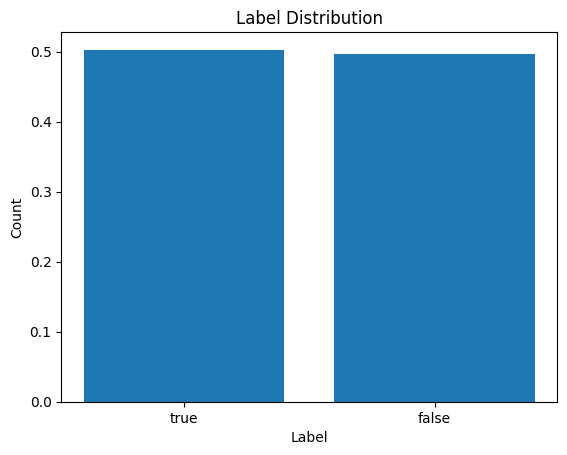

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(final_data['label'].value_counts().index, final_data['label'].value_counts(normalize=True).values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.savefig('label_distribution.png')
plt.show()

## Data cleaning

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(cleaned_tokens)

final_data['clean_claim'] = final_data['claim'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Average length of post/claim

In [ ]:
# average length
def average_words_per_text(texts):
    lengths = [len(str(text).split()) for text in texts]
    return sum(lengths) / len(lengths) if lengths else 0

avg_words = average_words_per_text(final_data["clean_claim"])
print(f"Average words per post: {avg_words:.2f}")

Average words per post: 12.14


## Top common words

In [ ]:
from collections import Counter
import re

def get_top_words_by_label(texts, labels, top_n=20):

    true_counter = Counter()
    false_counter = Counter()

    for text, label in zip(texts, labels):
        words = clean_text(text).split()
        if label.lower() == "true":
            true_counter.update(words)
        elif label.lower() == "false":
            false_counter.update(words)

    return true_counter.most_common(top_n), false_counter.most_common(top_n)

top_true, top_false = get_top_words_by_label(final_data['clean_claim'].tolist(), final_data['label'].tolist())

print("Top words in TRUE claims:")
print(top_true)

print("\nTop words in FALSE claims:")
print(top_false)

Top words in TRUE claims:
[('covid19', 1449), ('case', 1357), ('new', 994), ('test', 723), ('state', 665), ('coronavirus', 650), ('death', 635), ('health', 568), ('u', 506), ('number', 460), ('say', 460), ('people', 451), ('study', 386), ('report', 367), ('day', 346), ('drug', 337), ('testing', 331), ('total', 330), ('reported', 314), ('cancer', 306)]

Top words in FALSE claims:
[('coronavirus', 949), ('covid19', 908), ('say', 695), ('new', 669), ('day', 652), ('study', 616), ('health', 480), ('time', 452), ('drinking', 445), ('cancer', 430), ('people', 422), ('show', 411), ('daily', 407), ('cure', 395), ('claim', 388), ('two', 374), ('eating', 365), ('disease', 352), ('scientist', 326), ('heart', 322)]


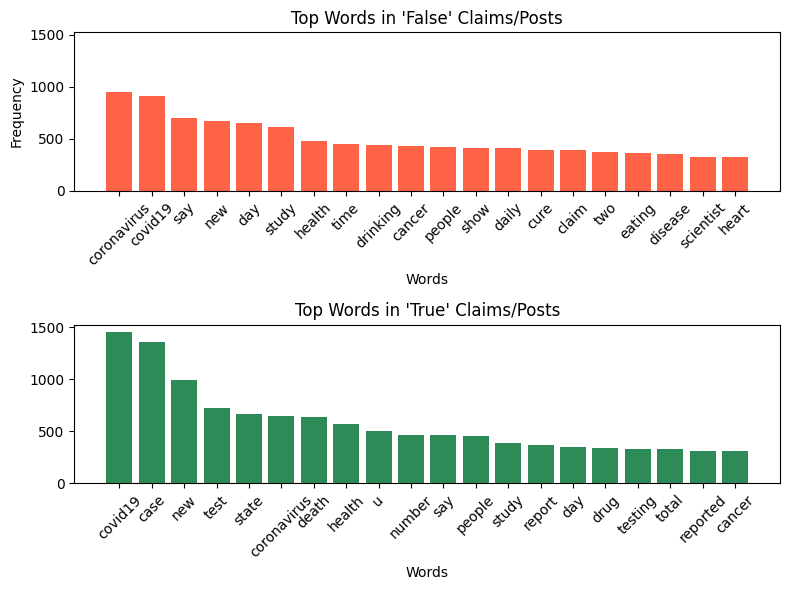

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_words_dual_subplot(top_words_false, top_words_true):
    words_false, counts_false = zip(*top_words_false)
    words_true, counts_true = zip(*top_words_true)

    fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharey=True)

    # False
    axes[0].bar(words_false, counts_false, color='tomato')
    axes[0].set_title("Top Words in 'False' Claims/Posts")
    axes[0].set_xlabel("Words")
    axes[0].set_ylabel("Frequency")
    axes[0].tick_params(axis='x', rotation=45)

    # True
    axes[1].bar(words_true, counts_true, color='seagreen')
    axes[1].set_title("Top Words in 'True' Claims/Posts")
    axes[1].set_xlabel("Words")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig("top_words_true_vs_false.png")
    plt.show()

plot_top_words_dual_subplot(top_false, top_true)

# Advanced models (BERT, BioBERT, RoBERTa)

In [ ]:
# labels in 1,0 format
final_data['label'] = final_data['label'].map({'true': 1, 'false': 0})

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot and save a confusion matrix heatmap for model evaluation
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    labels = ["False", "True"]

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix – {model_name}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix{model_name}.png")
    plt.show()

## BERT

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer

# Preprocess dataset for model input
dataset = Dataset.from_pandas(final_data)

# Load BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# tokenize
def tokenize(example):
    return tokenizer(
        example["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

tokenized_dataset = dataset.map(tokenize, batched=True)
tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/15877 [00:00<?, ? examples/s]

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into stratified train/test sets
train_indices, test_indices = train_test_split(
    range(len(final_data)),
    test_size=0.2,
    stratify=final_data["label"],
    random_state=42
)

# Train dataset
train_dataset = tokenized_dataset.select(train_indices)
# Test dataset
test_dataset = tokenized_dataset.select(test_indices)

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load pre-trained BERT model for binary classification
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np

# Define evaluation metrics: accuracy, precision, recall, F1, and print confusion matrix
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
    acc = accuracy_score(labels, preds)
    cm = confusion_matrix(labels, preds)
    print("\nConfusion Matrix:\n", cm)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [ ]:
from transformers import TrainingArguments, Trainer

# Define TrainingArguments
training_args = TrainingArguments(
    output_dir="./bert_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

# Initialize Trainer with model, data, and metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# Train the model
trainer.train()

# Evaluate model's performance on the test set
results = trainer.evaluate()
print(results)

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.395600,0.279308,0.862406,0.914286,0.801503,0.854188
2,0.222500,0.297845,0.869647,0.897781,0.835942,0.865759
3,0.155400,0.401550,0.867443,0.865217,0.872260,0.868725



Confusion Matrix:
 [[1459  120]
 [ 317 1280]]

Confusion Matrix:
 [[1427  152]
 [ 262 1335]]

Confusion Matrix:
 [[1362  217]
 [ 204 1393]]



Confusion Matrix:
 [[1362  217]
 [ 204 1393]]
{'eval_loss': 0.4015496075153351, 'eval_accuracy': 0.8674433249370277, 'eval_precision': 0.8652173913043478, 'eval_recall': 0.8722604884157796, 'eval_f1': 0.8687246647957593, 'eval_runtime': 43.921, 'eval_samples_per_second': 72.312, 'eval_steps_per_second': 4.531, 'epoch': 3.0}


In [ ]:
# Generate predictions and extract true/predicted labels
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=-1)


Confusion Matrix:
 [[1362  217]
 [ 204 1393]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# confusion matrix
#cm = confusion_matrix(y_true, y_pred)

# scores per label
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, labels=[0, 1], zero_division=0
)

# label's scores dataframe
metrics_df = pd.DataFrame({
    "label": [0, 1],
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "support": support
})

print("\n🔷 Metrics per label:")
print(metrics_df)

#metrics_df.to_csv(f"{training_args.output_dir}/metrics_per_label.csv", index=False)


🔷 Metrics per label:
   label  precision    recall  f1_score  support
0      0   0.869732  0.862571  0.866137     1579
1      1   0.865217  0.872260  0.868725     1597


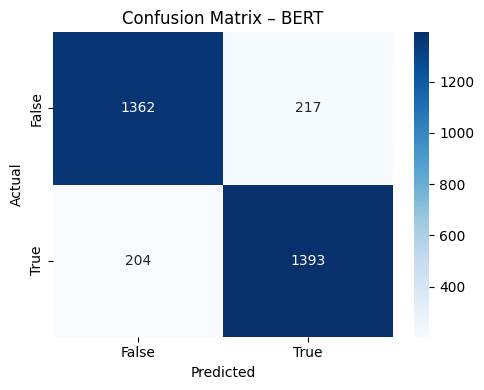

In [ ]:
# confusion matrix
plot_confusion_matrix(y_true, y_pred, model_name="BERT")

## BioBERT

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer

# Preprocess dataset for model input
dataset = Dataset.from_pandas(final_data)

# Load BioBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.1")

# tokenize
def tokenize(example):
    return tokenizer(example["claim"],
                     padding="max_length",
                     truncation=True,
                     max_length=256)

tokenized_dataset = dataset.map(tokenize, batched=True)
tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Map:   0%|          | 0/15877 [00:00<?, ? examples/s]

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into stratified train/test sets
train_indices, test_indices = train_test_split(
    range(len(final_data)),
    test_size=0.2,
    stratify=final_data["label"],
    random_state=42
)

# Train dataset
train_dataset = tokenized_dataset.select(train_indices)
# Test dataset
test_dataset = tokenized_dataset.select(test_indices)

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load BioBERT model for binary classification
model = AutoModelForSequenceClassification.from_pretrained(
    "dmis-lab/biobert-base-cased-v1.1",
    num_labels=2
)

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np

# Define evaluation metrics: accuracy, precision, recall, F1, and print confusion matrix
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
    acc = accuracy_score(labels, preds)
    cm = confusion_matrix(labels, preds)
    print("\nConfusion Matrix:\n", cm)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [ ]:
from transformers import TrainingArguments, Trainer

# Define TrainingArguments
training_args = TrainingArguments(
    output_dir="./biobert_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

# Initialize Trainer with model, data, and metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# Train the model
trainer.train()

# Evaluate model's performance on the test set
results = trainer.evaluate()
print(results)

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.405400,0.309939,0.848866,0.861489,0.833438,0.847231
2,0.235900,0.313052,0.859257,0.904930,0.804634,0.851840
3,0.169000,0.410198,0.859887,0.861809,0.859111,0.860458



Confusion Matrix:
 [[1365  214]
 [ 266 1331]]

Confusion Matrix:
 [[1444  135]
 [ 312 1285]]

Confusion Matrix:
 [[1359  220]
 [ 225 1372]]



Confusion Matrix:
 [[1359  220]
 [ 225 1372]]
{'eval_loss': 0.41019800305366516, 'eval_accuracy': 0.8598866498740554, 'eval_precision': 0.8618090452261307, 'eval_recall': 0.8591108328115216, 'eval_f1': 0.8604578237692067, 'eval_runtime': 44.1109, 'eval_samples_per_second': 72.0, 'eval_steps_per_second': 4.511, 'epoch': 3.0}


In [ ]:
# Generate predictions and extract true/predicted labels
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=-1)


Confusion Matrix:
 [[1359  220]
 [ 225 1372]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# confusion matrix
#cm = confusion_matrix(y_true, y_pred)

# scores per label
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, labels=[0, 1], zero_division=0
)

# labele's scores dataframe
metrics_df = pd.DataFrame({
    "label": [0, 1],
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "support": support
})

print("\n🔷 Metrics per label:")
print(metrics_df)

#metrics_df.to_csv(f"{training_args.output_dir}/metrics_per_label.csv", index=False)


🔷 Metrics per label:
   label  precision    recall  f1_score  support
0      0   0.857955  0.860671  0.859311     1579
1      1   0.861809  0.859111  0.860458     1597


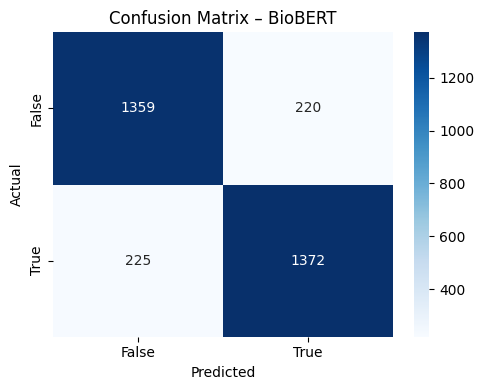

In [ ]:
# plot confusion matrix
plot_confusion_matrix(y_true, y_pred, model_name="BioBERT")

## RoBERTa

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer

# Preprocess dataset for model input
dataset = Dataset.from_pandas(final_data)

# Load RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# tokenize
def tokenize(example):
    return tokenizer(
        example["claim"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

tokenized_dataset = dataset.map(tokenize, batched=True)
tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/15877 [00:00<?, ? examples/s]

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into stratified train/test sets
train_indices, test_indices = train_test_split(
    range(len(final_data)),
    test_size=0.2,
    stratify=final_data["label"],
    random_state=42
)

# Train dataset
train_dataset = tokenized_dataset.select(train_indices)
# Test dataset
test_dataset = tokenized_dataset.select(test_indices)

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load RoBERTa model for binary classification
model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np

# Define evaluation metrics: accuracy, precision, recall, F1, and print confusion matrix
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
    acc = accuracy_score(labels, preds)
    cm = confusion_matrix(labels, preds)
    print("\nConfusion Matrix:\n", cm)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [ ]:
from transformers import TrainingArguments, Trainer

# Define TrainingArguments
training_args = TrainingArguments(
    output_dir="./roberta_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

# Initialize Trainer with model, data, and metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# Train the model
trainer.train()

# Evaluate model's performance on the test set
results = trainer.evaluate()
print(results)

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.383600,0.263382,0.869647,0.898854,0.834690,0.865584
2,0.243400,0.278775,0.869332,0.874525,0.864120,0.869291
3,0.191700,0.331745,0.875000,0.873599,0.878522,0.876054



Confusion Matrix:
 [[1429  150]
 [ 264 1333]]

Confusion Matrix:
 [[1381  198]
 [ 217 1380]]

Confusion Matrix:
 [[1376  203]
 [ 194 1403]]



Confusion Matrix:
 [[1376  203]
 [ 194 1403]]
{'eval_loss': 0.3317449390888214, 'eval_accuracy': 0.875, 'eval_precision': 0.8735990037359901, 'eval_recall': 0.878522229179712, 'eval_f1': 0.876053699656572, 'eval_runtime': 36.9029, 'eval_samples_per_second': 86.064, 'eval_steps_per_second': 5.393, 'epoch': 3.0}


In [ ]:
# Generate predictions and extract true/predicted labels
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=-1)


Confusion Matrix:
 [[1376  203]
 [ 194 1403]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# confusion matrix
#cm = confusion_matrix(y_true, y_pred)

# scores per label
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, labels=[0, 1], zero_division=0
)

# labele's scores dataframe
metrics_df = pd.DataFrame({
    "label": [0, 1],
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "support": support
})

print("\n🔷 Metrics per label:")
print(metrics_df)

#metrics_df.to_csv(f"{training_args.output_dir}/metrics_per_label.csv", index=False)


🔷 Metrics per label:
   label  precision    recall  f1_score  support
0      0   0.876433  0.871438  0.873928     1579
1      1   0.873599  0.878522  0.876054     1597


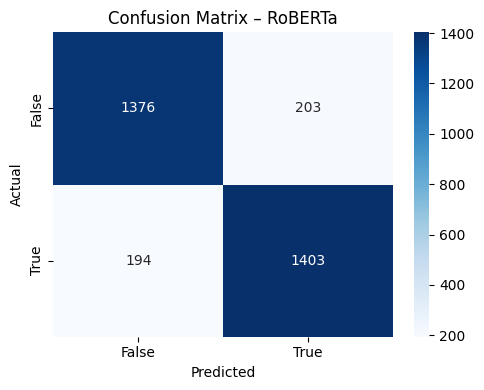

In [ ]:
# plot confusion matrix
plot_confusion_matrix(y_true, y_pred, model_name="RoBERTa")